## Projeto Acidentes| Analisando dados de acidentes e ferimentos

Este é um projeto de análise de dados sobre acidentes de trânsito para tirar inferências e usar esses insights para minimizar a taxa de acidentes. Foi considerado um modelo resumido do site Este é um projeto de análise de dados sobre acidentes de trânsito para tirar inferências e usar esses insights para minimizar a taxa de acidentes. Foi considerado um modelo resumido extraído do www.transtats.bts.gov.

## 1. Carregando dados com pandas

Nesta etapa, utilizamos a biblioteca Pandas para o carregamento e manipulação dos dados. A função read_csv foi usada para importar o conjunto de dados, que foi armazenado em um DataFrame chamado data.

In [377]:
import pandas as pd
import numpy as np

In [378]:
data=pd.read_csv("case_dados.csv")

In [379]:
import statsmodels.api as sm

y = 'Injury'

data = data.drop(['Weather'], axis=1)  

print(data.head())


   Rush Hour  Alcohol Involved  Align  Work Zone  Weekday  \
0          0                 0      2          0        1   
1          1                 0      1          0        1   
2          1                 0      1          0        1   
3          1                 0      1          0        0   
4          1                 1      1          0        1   

   Accident at Intersection  Accident at Roadway  Speed Limit  \
0                         1                    0           40   
1                         1                    1           70   
2                         1                    1           35   
3                         1                    1           35   
4                         0                    1           25   

   Number of Vehical Involved  Injury  
0                           1       1  
1                           2       2  
2                           2       2  
3                           2       2  
4                           3       2  


In [380]:
data.drop([y], axis=1)

,Rush Hour,Alcohol Involved,Align,Work Zone,Weekday,Accident at Intersection,Accident at Roadway,Speed Limit,Number of Vehical Involved
0,0,0,2,0,1,1,0,40,1
1,1,0,1,0,1,1,1,70,2
2,1,0,1,0,1,1,1,35,2
3,1,0,1,0,0,1,1,35,2
4,1,1,1,0,1,0,1,25,3
...,...,...,...,...,...,...,...,...,...
42178,0,0,1,1,1,0,0,45,1
42179,1,0,1,0,0,1,0,55,1
42180,0,0,2,0,1,0,0,55,1
42181,1,0,1,0,1,0,0,65,1


In [381]:
  modelo = sm.OLS(data[y], data.drop([y], axis=1))
  res = modelo.fit()))

                                 OLS Regression Results                                
Dep. Variable:                 Injury   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                          3.370e+04
Date:                Sun, 15 Dec 2024   Prob (F-statistic):                        0.00
Time:                        20:51:50   Log-Likelihood:                         -34879.
No. Observations:               42183   AIC:                                  6.978e+04
Df Residuals:                   42174   BIC:                                  6.985e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

### 2. Scikit-Learn

Nesta etapa, os dados foram divididos em treino e validação usando train_test_split, com 30% para validação e random_state=0 para reprodutibilidade. Em seguida, um modelo de Regressão Linear foi treinado com os dados de treino usando LinearRegression e realizou previsões no conjunto de validação.

In [384]:
data.shape

(42183, 10)

In [385]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Xtrain, Xval, ytrain, yval = train_test_split(X, data[y], test_size=0.3, random_state=0)
print(Xtrain.shape, Xval.shape, ytrain.shape, yval.shape)

modelo = LinearRegression()
modelo.fit(Xtrain, ytrain)

p = modelo.predict(Xval)



(29528, 9) (12655, 9) (29528,) (12655,)


### 3. Raiz quadrada do erro quadrático médio (RMSE)

O RMSE mede a dispersão dos erros de previsão. Quanto menor o valor do RMSE, melhor o modelo, pois isso significa que as previsões estão mais próximas dos valores reais.

In [388]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(yval, p))

0.4982946586758464

### 4. Correlação entre as variáveis independentes e a variável "Injury"


A relação entre acidentes com feridos e não feridos é essencial para entender a gravidade das colisões nas vias. Embora muitos acidentes resultem em danos materiais sem vítimas, uma parte significativa envolve ferimentos, variando de leves a graves. Fatores como a velocidade, as condições climáticas, a presença de álcool e o uso de equipamentos de segurança influenciam diretamente a severidade dos acidentes. Estudar essa relação permite identificar padrões que podem orientar estratégias de prevenção e melhorar a segurança no trânsito.

0
[1 2]
Injury
2    21187
1    20996
Name: count, dtype: int64


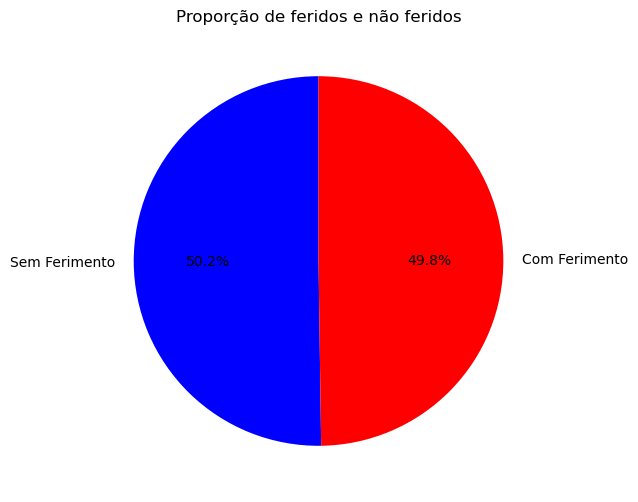

In [391]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('case_dados.xlsx')

print(df['Injury'].isnull().sum()) 
print(df['Injury'].unique())  

df['Injury'] = df['Injury'].fillna(0)  

print(df['Injury'].value_counts())

plt.figure(figsize=(6, 6))
df['Injury'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'], labels=['Sem Ferimento', 'Com Ferimento'], startangle=90)
plt.title('Proporção de feridos e não feridos')
plt.ylabel('') 
plt.show()

### 5. Relação entre velocidade a acidentes com ferimentos

A relação entre velocidade e acidentes com ferimentos é um tema crucial para a segurança viária. Aumentos nos limites de velocidade geralmente resultam em maior severidade nos acidentes, aumentando a probabilidade de ferimentos graves. Estudos mostram que, em velocidades mais altas, o tempo de reação e a distância de frenagem aumentam, tornando os acidentes mais perigosos. Analisar essa relação pode ajudar na definição de políticas públicas mais eficazes para reduzir acidentes e proteger os motoristas.

C:\Users\luizb\AppData\Local\Temp\ipykernel_4976\2256241856.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  speed_injury_counts = df.groupby('Speed Range')['Injury'].value_counts().unstack().fillna(0)


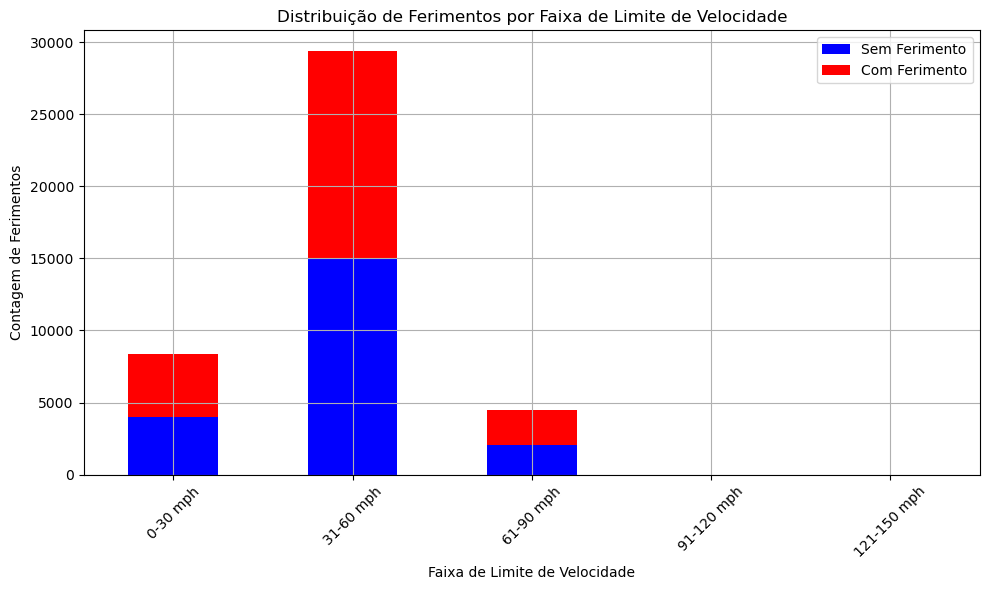

In [396]:
df['Injury'] = df['Injury'].fillna(0)

bins = [0, 30, 60, 90, 120, 150] 
labels = ['0-30 mph', '31-60 mph', '61-90 mph', '91-120 mph', '121-150 mph']
df['Speed Range'] = pd.cut(df['Speed Limit'], bins=bins, labels=labels)

speed_injury_counts = df.groupby('Speed Range')['Injury'].value_counts().unstack().fillna(0)

speed_injury_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

plt.title('Distribuição de Ferimentos por Faixa de Limite de Velocidade')
plt.xlabel('Faixa de Limite de Velocidade')
plt.ylabel('Contagem de Ferimentos')
plt.xticks(rotation=45)
plt.legend(['Sem Ferimento', 'Com Ferimento'])
plt.grid(True)
plt.tight_layout()

plt.show()


### 6. Relação entre horário de "Rush", limite de velocidade da vida e feridos em acidentes.

O gráfico tridimensional apresenta a relação entre o horário de pico, o limite de velocidade e a incidência de ferimentos. No eixo X, temos o limite de velocidade, variando de 0 a 80; no eixo Y, o horário de pico, onde valores próximos de 1 representam o horário de pico e valores próximos de 0 representam fora do pico; e no eixo Z, a intensidade dos ferimentos, normalizada entre 0 e 1.

A cor dos pontos no gráfico indica a gravidade dos ferimentos, seguindo a escala mostrada na barra lateral: azul representa ferimentos leves ou inexistentes, enquanto vermelho indica ferimentos mais graves. Observa-se que durante o horário de pico, representado por valores próximos a 1 no eixo Y, há uma concentração maior de pontos vermelhos, indicando uma maior gravidade nos ferimentos. Fora do horário de pico, os pontos são predominantemente azuis, indicando menor gravidade, independentemente do limite de velocidade. Além disso, nota-se que conforme o limite de velocidade aumenta, especialmente durante o horário de pico, os ferimentos graves se tornam mais comuns.

Em resumo, o gráfico evidencia que o horário de pico está associado a uma maior gravidade dos ferimentos em acidentes, especialmente quando os limites de velocidade são mais altos. Fora do horário de pico, a gravidade tende a ser menor, independentemente do limite de velocidade. Esse padrão sugere a importância de medidas que controlem a velocidade e a gestão adequada do trânsito durante os horários de pico para reduzir a gravidade dos acidentes.

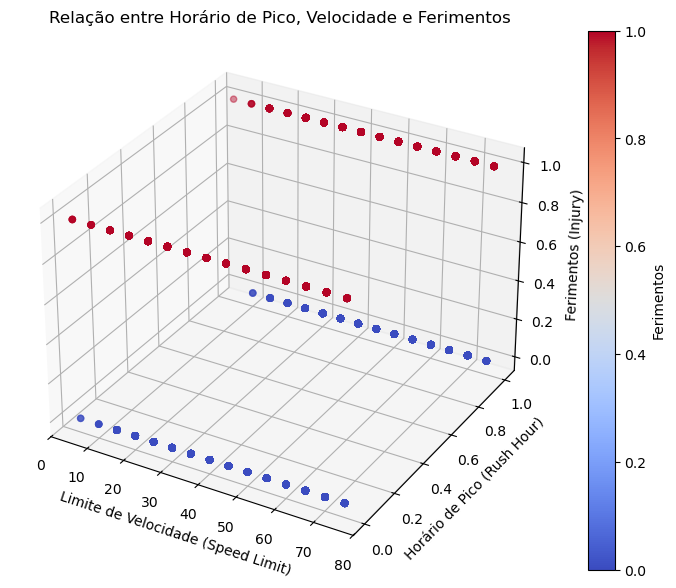

In [403]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_excel('case_dados.xlsx')

df['Rush Hour'] = df['Rush Hour'].map({0: 'Not Rush Hour', 1: 'Rush Hour'})
df['Injury'] = df['Injury'].map({1: 'Injury', 2: 'No Injury'})

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['Speed Limit']
y = df['Rush Hour'].map({'Not Rush Hour': 0, 'Rush Hour': 1})  
z = df['Injury'].map({'No Injury': 0, 'Injury': 1})  

scatter = ax.scatter(x, y, z, c=z, cmap='coolwarm', marker='o')

ax.set_title('Relação entre Horário de Pico, Velocidade e Ferimentos')
ax.set_xlabel('Limite de Velocidade (Speed Limit)')
ax.set_ylabel('Horário de Pico (Rush Hour)')
ax.set_zlabel('Ferimentos (Injury)')

cbar = plt.colorbar(scatter)
cbar.set_label('Ferimentos')

plt.show()


### Limitações dos Modelos Criados:
Os modelos desenvolvidos apresentam algumas limitações que devem ser consideradas ao interpretar os resultados. Primeiramente, a análise foi baseada em um número limitado de variáveis, o que pode não capturar a complexidade total dos fatores que influenciam os acidentes e os ferimentos. Além disso, a regressão linear, embora útil, pode não ser a melhor técnica para lidar com dados altamente não lineares ou interações complexas entre variáveis. A utilização de apenas uma variável como "Limite de Velocidade" em alguns modelos pode resultar em uma simplificação excessiva, negligenciando a interação entre múltiplos fatores que influenciam os acidentes. Outra limitação importante é a possível imprecisão nos dados de entrada, como valores nulos ou informações inconsistentes, que podem afetar a qualidade das previsões.

### Melhorias Possíveis:
Para melhorar os modelos, seria interessante expandir o conjunto de variáveis analisadas e seus devidos valores. Trabalhando apenas com dados binários "0" e "1" podemos ter uma limitação de escopo do projeto. Melhoria do onhecimento técnico do programador seria muitíssimo enriquecedor, portanto, um estágio na grande BlackBird seria uma possível melhoria. 